# Importing

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Reading data

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tasks/nlp/t1/all_data.csv')

In [4]:
df

,book_title,Book_series,book_rating,book_author,genre,reviewer_name,review,ID
0,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",emma,202.\nThat’s the number of times that the word...,1
1,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",Em (RunawayWithDreamthieves),I need a black silk robe and a balcony to wear...,2
2,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",Cait • A Page with a View,THIS BOOK TOTALLY WRECKED ME. In the best poss...,3
3,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",Natalie Monroe,"3.75 stars\n""Rhys stepped off the stairs and t...",4
4,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",Emily May,I wish so much that I could tell you I loved t...,5
...,...,...,...,...,...,...,...,...
21554,Harry Potter and the deathly hallows,Harry Potter#7,4.62,"J.K. Rowling,","Fantasy, Young Adult, Fiction",may ❀,no one ask me about the book bc i literally re...,21555
21555,Harry Potter and the deathly hallows,Harry Potter#7,4.62,"J.K. Rowling,","Fantasy, Young Adult, Fiction",Christy,I started the Harry Potter audio books at the ...,21556
21556,Harry Potter and the deathly hallows,Harry Potter#7,4.62,"J.K. Rowling,","Fantasy, Young Adult, Fiction",P,"“Do not pity the dead, Harry. Pity the living,...",21557
21557,Harry Potter and the deathly hallows,Harry Potter#7,4.62,"J.K. Rowling,","Fantasy, Young Adult, Fiction",Gerasimos,Harry Potter changed my life. If I hadn’t read...,21558


# Pre-Processing

## Download necessary NLTK resources

In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Text Cleaning

In [6]:
def clean_text(text):
    text = str(text)
    text = re.sub(r'<.*?>', '', text)  # remove HTML
    text = re.sub(r'http\S+', '', text)  # remove url
    text = re.sub(r'https\S+', '', text)  # remove url
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove special characters
    text = text.lower()  # convert to lowercase
    return text

df['cleaned_review'] = df['review'].apply(clean_text)

## Tokenize and remove stop words

In [7]:
df['tokenized'] = df['cleaned_review'].apply(word_tokenize)# tokenization

# remove stopwords and non-alphabetic tokens
stop_words = set(stopwords.words('english'))
df['filtered'] = df['tokenized'].apply(lambda tokens: [word for word in tokens if word.isalpha() and word not in stop_words])

## Lemmatize

In [8]:
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['filtered'].apply(lambda words: [lemmatizer.lemmatize(word) for word in words])

# Word count column
df['review_length'] = df['lemmatized'].apply(len)


# EDA

## Rating Distribution

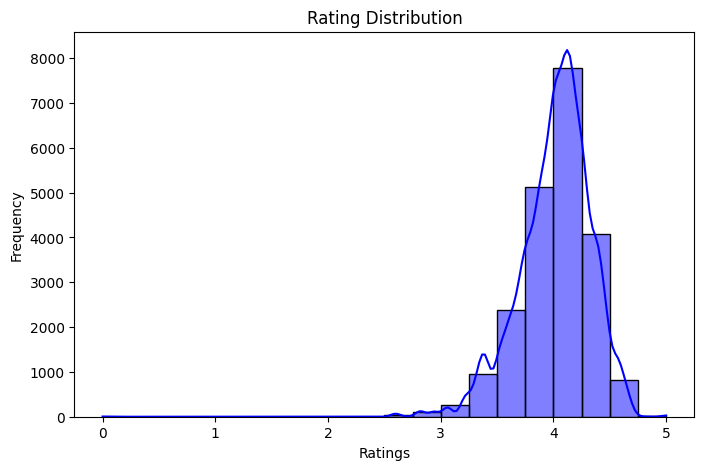

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df['book_rating'], bins=20, kde=True, color='blue')
plt.title("Rating Distribution")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

## Review Length vs Ratings

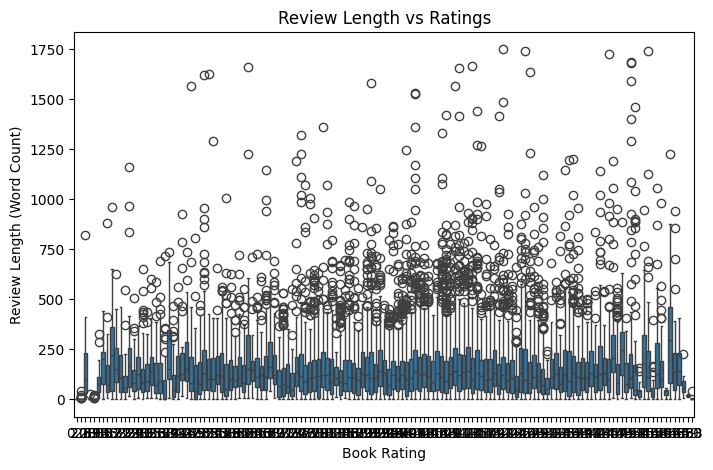

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['book_rating'], y=df['review_length'])
plt.title("Review Length vs Ratings")
plt.xlabel("Book Rating")
plt.ylabel("Review Length (Word Count)")
plt.show()

## Word Frequency - WordCloud

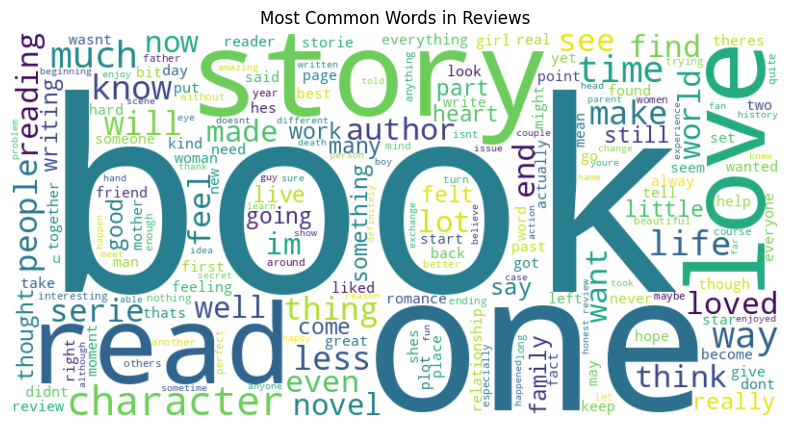

In [11]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_review']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Reviews")
plt.show()

## Comparison Visualization: Original vs. Cleaned Reviews

In [12]:
for i in range(0,5):
  print("before clean")
  print(df['review'][i])
  print("\n")
  print("after clean")
  print(df['cleaned_review'][i])
  print("\n")
  print("\n")

before clean
202.
That’s the number of times that the word “mate,” in any of its hellish forms, is used in this book.
TWO.
HUNDRED.
AND.
TWO.
https://emmareadstoomuch.wordpress.co...
That statistic alone should be enough to justify this one star rating. If you feel satisfied enough to just remove yourself from this review, run with that feeling. Because I have, like. Seven pages of sh*t to complain about.
That’s if I’m efficient.
And I’ve never been an efficient reviewer. Once. In my life. I counted two hundred (and two) uses of a word over seven hundred pages. That shouldn’t scream “rational and in control of her passionate fury” to you.
So buckle up, buttercup. We’ve got some categories to run through.
DISCLAIMER : This review is teeming with spoilers. It is also X-rated, due to the strength of my anger and the copious sex scenes in the source material.
I HATE THESE CHARACTERS
Rhys makes me cringe harder than Renee Zellweger in Bridget Jones’ Diary. (At least that movie has both Coli

In [13]:
# # Save preprocessed dataset
# df.to_csv("preprocessed_book_reviews.csv", index=False)

# Model

## Word2Vec Model Training and save or load

In [14]:
def saveTrain_loadModel():
    model_path = "text_review_word2vec.model"# path
    if not os.path.exists(model_path):# if model is not saved save it else load it
        sentences = df['lemmatized'].tolist()
        word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=3, workers=4)
        word2vec_model.save(model_path)
    else:# load it
        word2vec_model = Word2Vec.load(model_path)
    return word2vec_model

word2vec_model = saveTrain_loadModel()

## Evaluate

In [15]:
def findtopnSimWords(model,word,topn = 5):# find top words that is similer to that word
  print(f"Most similar words to '{word}':", model.wv.most_similar(word, topn=topn))
findtopnSimWords(word2vec_model,'great',5)

Most similar words to 'great': [('fantastic', 0.7668948769569397), ('good', 0.7299718260765076), ('wonderful', 0.7227230668067932), ('excellent', 0.7195152640342712), ('amazing', 0.6963327527046204)]


## Visualize

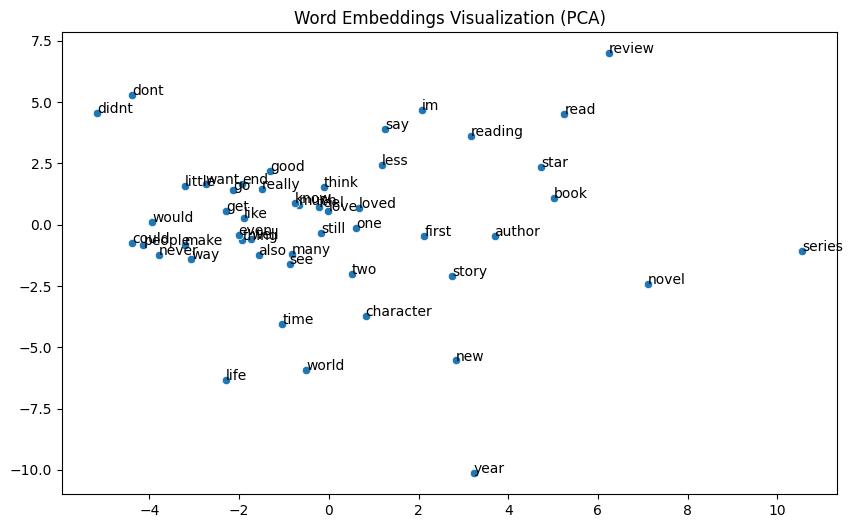

In [16]:

# Visualizing Word Embeddings using PCA
words = list(word2vec_model.wv.index_to_key)[:50]  # get top 50 words
word_vectors = np.array([word2vec_model.wv[word] for word in words])
# 2 dimension with pca
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)
# plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=word_vectors_pca[:, 0], y=word_vectors_pca[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (word_vectors_pca[i, 0], word_vectors_pca[i, 1]))
plt.title("Word Embeddings Visualization (PCA)")
plt.show()


In [17]:
# Generate Document Embeddings
def get_review_embedding(review):
    vectors = [word2vec_model.wv[word] for word in review if word in word2vec_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(word2vec_model.vector_size)

df['document_embedding'] = df['lemmatized'].apply(get_review_embedding)

# SAVE

In [18]:
doc_embeddings = np.vstack(df['document_embedding'].values)
np.save("document_embeddings.npy", doc_embeddings)# save document embeddings
df.to_csv("preprocessed_book_reviews_with_embeddings.csv", index=False)# save dataframe with embeddings